Does increased electric vehicle sales lead to more public or private charging ports?

- Load the three CSV files into separate DataFrames. [Done]
- Then join the private and public charging DataFrames into one DataFrame called df_temp.[Done]
- Keeping only the rows and columns with complete and relevant data.[Done]
- Determine the total number of vehicles sold each year and join that data to df_temp.[Done]
- Saving it as a DataFrame called df_complete; keeping only the rows with complete data.[Done]



This is extra.
- Plot trends for private ports, public ports, and sales, saving this as fig, ax objects.
- Does increased electric vehicle sales lead to more "public" or "private" charging ports? Save your string answer to solution.

In [35]:
#This is to import the pandas document.
import pandas as pd

In [2]:
#Assigning the titles of the pages to variables.
sales = 'ev_sales.csv'
public = 'public_ev_charging.csv'
private = 'private_ev_charging.csv'

#Creating dataframe using pandas.
evSales = pd.read_csv(sales)
evPublic = pd.read_csv(public)
evPrivate = pd.read_csv(private)

In [3]:
#Making sure that the head of each one is clear. 
evPublic.head()

,year,public_ports,public_station_locations
0,2013,16619,6938
1,2014,22470,9207
2,2015,26532,10710
3,2016,33165,13150
4,2017,45789,16170


In [4]:
#Making sure that the head of each one is clear. 
evPrivate.head()

,year,private_ports,private_station_locations
0,2014,3695,1825
1,2015,4150,1962
2,2016,5763,2331
3,2017,6048,2370
4,2018,6812,2489


In [5]:
#This shows a single number which identified the total amount of null values across 
#the entire dataframe. 
evPrivate.isnull().sum().sum()

0

In [6]:
#This shows the missing or null data in the respective fields.
evPublic.isnull().sum()

year                        0
public_ports                0
public_station_locations    0
dtype: int64

From the above checks I can see that all the infromation is filled and that there is nothing missing from the data. Therefore it will be fine for me to go ahead and ensure that I can merge the data 

In [7]:
evPublic.shape

(10, 3)

In [8]:
evPublic.head(10)

,year,public_ports,public_station_locations
0,2013,16619,6938
1,2014,22470,9207
2,2015,26532,10710
3,2016,33165,13150
4,2017,45789,16170
5,2018,56842,19893
6,2019,73838,23282
7,2020,96190,28602
8,2021,114451,46407
9,2022,136513,53764


In [9]:
evPrivate.shape

(9, 3)

In [10]:
evPrivate.head(10)

,year,private_ports,private_station_locations
0,2014,3695,1825
1,2015,4150,1962
2,2016,5763,2331
3,2017,6048,2370
4,2018,6812,2489
5,2019,9955,3078
6,2020,10647,2768
7,2021,18867,4074
8,2022,19993,4435


After checking the data again I can see that the shape of the data is different for both of the data frames. An inner join will solve this.

In [11]:
df_temp = evPrivate.merge(evPublic, on = 'year')
df_temp.shape

(9, 5)

In [12]:
df_temp.head(10)

,year,private_ports,private_station_locations,public_ports,public_station_locations
0,2014,3695,1825,22470,9207
1,2015,4150,1962,26532,10710
2,2016,5763,2331,33165,13150
3,2017,6048,2370,45789,16170
4,2018,6812,2489,56842,19893
5,2019,9955,3078,73838,23282
6,2020,10647,2768,96190,28602
7,2021,18867,4074,114451,46407
8,2022,19993,4435,136513,53764


The code above shows that the 2013 values were removed because an inner join was performed; this also shows that there will be no data for the other ones.

In [13]:
evSales.isnull().sum()

Vehicle      0
year         0
sales      254
dtype: int64

In [14]:
#Making sure that the head of each one is clear. 
evSales.head(10)

,Vehicle,year,sales
0,Chevy Volt,2011,7671.0
1,Chevy Volt,2012,23461.0
2,Chevy Volt,2013,23094.0
3,Chevy Volt,2014,18805.0
4,Chevy Volt,2015,15393.0
5,Chevy Volt,2016,24739.0
6,Chevy Volt,2017,20349.0
7,Chevy Volt,2018,18306.0
8,Chevy Volt,2019,4915.0
9,Nissan Leaf,2011,9674.0


In [15]:
#This is the shape that shows how many cars have been sold.
evSales.shape

(495, 3)

In [16]:
#This drops the values that do no have anything in them.
evSales.dropna(inplace=True)
evSales.shape

(241, 3)

In [17]:
evSales.head(20)

,Vehicle,year,sales
0,Chevy Volt,2011,7671.0
1,Chevy Volt,2012,23461.0
2,Chevy Volt,2013,23094.0
3,Chevy Volt,2014,18805.0
4,Chevy Volt,2015,15393.0
5,Chevy Volt,2016,24739.0
6,Chevy Volt,2017,20349.0
7,Chevy Volt,2018,18306.0
8,Chevy Volt,2019,4915.0
9,Nissan Leaf,2011,9674.0


In [36]:
#This is showing that there is no values that has been missing. 
evSales.isnull().sum()

Vehicle    0
year       0
sales      0
dtype: int64

This will be shown that there are now no msiing ca

In [19]:
#The group by function lets us group together the things that have the same vlue in other columns.
new_table = evSales.groupby('year').sum()
new_table.head(10)

,Vehicle,sales
year,,
2011,Chevy VoltNissan LeafSmart EDMitsubishi I EV,17763.0
2012,Chevy VoltNissan LeafSmart EDMitsubishi I EVBM...,53171.0
2013,Chevy VoltNissan LeafSmart EDMitsubishi I EVPr...,97102.0
2014,Chevy VoltNissan LeafSmart EDMitsubishi I EVPr...,118882.0
2015,Chevy VoltNissan LeafSmart EDMitsubishi I EVPr...,114023.0
2016,Chevy VoltNissan LeafSmart EDMitsubishi I EVPr...,159616.0
2017,Chevy VoltNissan LeafSmart EDMitsubishi I EVPr...,195581.0
2018,Chevy VoltNissan LeafSmart EDPrius PHEVFord Fo...,361315.0
2019,Chevy VoltNissan LeafSmart EDPrius PHEVTesla M...,326644.0


In [20]:
#I merged the two tables using an inner join. This means that if it is not present in BOTH sections the rest
#of the information would be left out of the join.
df_complete = df_temp.merge(new_table, on='year')

In [21]:
df_complete.head(10)

,year,private_ports,private_station_locations,public_ports,public_station_locations,Vehicle,sales
0,2014,3695,1825,22470,9207,Chevy VoltNissan LeafSmart EDMitsubishi I EVPr...,118882.0
1,2015,4150,1962,26532,10710,Chevy VoltNissan LeafSmart EDMitsubishi I EVPr...,114023.0
2,2016,5763,2331,33165,13150,Chevy VoltNissan LeafSmart EDMitsubishi I EVPr...,159616.0
3,2017,6048,2370,45789,16170,Chevy VoltNissan LeafSmart EDMitsubishi I EVPr...,195581.0
4,2018,6812,2489,56842,19893,Chevy VoltNissan LeafSmart EDPrius PHEVFord Fo...,361315.0
5,2019,9955,3078,73838,23282,Chevy VoltNissan LeafSmart EDPrius PHEVTesla M...,326644.0


In [22]:
#The vehicle column has been dropped as we do not need the information that is presented. 
df_complete = df_complete.drop('Vehicle', axis=1)

In [23]:
df_complete.head()

,year,private_ports,private_station_locations,public_ports,public_station_locations,sales
0,2014,3695,1825,22470,9207,118882.0
1,2015,4150,1962,26532,10710,114023.0
2,2016,5763,2331,33165,13150,159616.0
3,2017,6048,2370,45789,16170,195581.0
4,2018,6812,2489,56842,19893,361315.0


In [29]:
import matplotlib.pyplot as plt

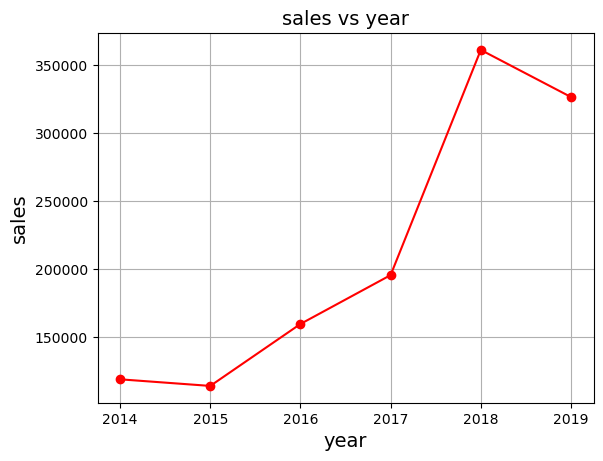

In [32]:
plt.plot(df_complete['year'], df_complete['sales'], color='red', marker='o')
plt.title('sales vs year', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.ylabel('sales', fontsize=14)
plt.grid(True)
plt.show()

- I have not been through the visualosation section of the learning.
- However I have been able to remove the data that is missing.